## Importing The Required Libraries and Magic


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [2]:
plt.style.use('seaborn-white')

## Uploading Data Sets

In [3]:
# Data Set for gaming hours of steam

st = pd.read_csv('Data_Sets/steam-200k.csv',names=['User_ID','Game','Action','Value','Other'])
st.head(10)

,User_ID,Game,Action,Value,Other
0,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
1,151603712,The Elder Scrolls V Skyrim,play,273.0,0
2,151603712,Fallout 4,purchase,1.0,0
3,151603712,Fallout 4,play,87.0,0
4,151603712,Spore,purchase,1.0,0
5,151603712,Spore,play,14.9,0
6,151603712,Fallout New Vegas,purchase,1.0,0
7,151603712,Fallout New Vegas,play,12.1,0
8,151603712,Left 4 Dead 2,purchase,1.0,0
9,151603712,Left 4 Dead 2,play,8.9,0


In [4]:
# Data Set for Metacritic Ratings

rt = pd.read_csv('Data_Sets/metacritic_games.csv')
rt.head(10)

,game,platform,developer,genre,number_players,rating,release_date,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users,metascore,user_score
0,Portal 2,PC,Valve Software,Action,NaN,E10+,"Apr 18, 2011",51,1,0,1700,107,19,95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,No Online Multiplayer,M,"Nov 10, 2011",32,0,0,1616,322,451,94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,No Online Multiplayer,E10+,"Jun 19, 2011",84,1,0,283,20,5,94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,NaN,T,"Nov 21, 2011",27,0,0,240,34,27,91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,No Online Multiplayer,E,"Nov 13, 2011",81,1,0,251,39,11,90,84
5,Deus Ex: Human Revolution,PC,Nixxes Software,Action,No Online Multiplayer,M,"Aug 23, 2011",52,0,0,520,112,78,90,85
6,Pushmo,3DS,Intelligent Systems,Miscellaneous,1 Player,E,"Dec 8, 2011",31,0,0,34,4,2,90,83
7,Total War: Shogun 2,PC,Creative Assembly,Strategy,Online Multiplayer,T,"Mar 15, 2011",62,0,0,187,44,29,90,84
8,FIFA Soccer 12,PC,Electronic Arts,Sports,NaN,E,"Sep 27, 2011",14,0,0,33,8,10,89,71
9,Battlefield 3,PC,EA DICE,Action,NaN,M,"Oct 25, 2011",60,1,0,1061,191,271,89,76


## Data Cleaning


In [5]:
#Removing User ID's as they are of no interest in this EDA 

st = st[['Game','Action','Value']]

#Taking only play hours of the games and dropping the absolete action column

st = st[st['Action'] == 'play']
st.drop(['Action'],inplace=True,axis=1)
st.rename(columns={'Value':'Hours Played'},inplace=True)

#Taking Cumulative Playing time of all the users

st = st.groupby('Game').sum().reset_index()
st = st.sort_values('Hours Played',ascending = False).reset_index(drop=True)

#top 10 Most Played Games

st.head(10)

,Game,Hours Played
0,Dota 2,981684.6
1,Counter-Strike Global Offensive,322771.6
2,Team Fortress 2,173673.3
3,Counter-Strike,134261.1
4,Sid Meier's Civilization V,99821.3
5,Counter-Strike Source,96075.5
6,The Elder Scrolls V Skyrim,70889.3
7,Garry's Mod,49725.3
8,Call of Duty Modern Warfare 2 - Multiplayer,42009.9
9,Left 4 Dead 2,33596.7


In [6]:
#Keeping only relevant columns

col = rt.columns
rt = rt[col[:2].tolist()+col[7:-2].tolist()]

#Taking only PC games
rt = rt[rt['platform'] == 'PC']
rt.drop(['platform'],axis=1,inplace=True)

rt.head()

,game,positive_critics,neutral_critics,negative_critics,positive_users,neutral_users,negative_users
0,Portal 2,51,1,0,1700,107,19
1,The Elder Scrolls V: Skyrim,32,0,0,1616,322,451
3,Batman: Arkham City,27,0,0,240,34,27
5,Deus Ex: Human Revolution,52,0,0,520,112,78
7,Total War: Shogun 2,62,0,0,187,44,29


## Generating a rating index by using the overall ratings of both the critics and users

### Assigning scroes to all the rating

- Postive Critic = + 1
- Neutral Critic = + 0.5
- Negative Critic = - 1
- Positive User = + 1
- Neutral User = + 0.5
- Negative User = - 1

### Calculating the final Score

In [7]:
#Score

rt['neutral_critics'] = rt['neutral_critics']*0.5
rt['negative_critics'] = rt['negative_critics']*(-1)
rt['neutral_users'] = rt['neutral_users']*0.5
rt['negative_users'] = rt['negative_users']*(-1)
rt['Score'] = rt['positive_critics'] + rt['neutral_critics'] + rt['negative_critics'] + rt['neutral_users'] + rt['negative_users'] + rt['positive_users']
rt = rt[['game','Score']].rename(columns={'game':'Game'})
rt = rt.sort_values('Score',ascending=False).reset_index(drop=True)

#Top 10 Rated Games
rt.head(10)

,Game,Score
0,Portal 2,1786.0
1,The Elder Scrolls V: Skyrim,1358.0
2,The Witcher 3: Wild Hunt,1277.0
3,The Witcher 2: Assassins of Kings,1214.5
4,BioShock Infinite,1174.5
5,Battlefield 3,946.0
6,Undertale,786.0
7,Guild Wars 2,632.5
8,Tomb Raider,563.0
9,Deus Ex: Human Revolution,550.0


### Conclusion 1. The set of Most Played games and Top rated games turns out to be  disjoint. As an outcome of which the EDA from this point on will be divided into two section namely :-
  1.  Comparing the Play Time of Most Played games with thier respective rating.
###    
  2.  Comparing the Play Time of Top Rated games with thier respective Play Time.

$--------------------------------------------------------------$

In [8]:
# Developing the merge Datasets

final = pd.merge(st,rt,how='inner',left_on='Game',right_on='Game')
topst = final.sort_values('Hours Played',ascending=False)[2:12]
topst

,Game,Hours Played,Score
2,Football Manager 2012,30845.8,64.5
3,Football Manager 2014,30574.8,7.5
4,Terraria,29951.8,522.5
5,Warframe,27074.6,269.0
6,Football Manager 2015,24283.1,26.5
7,Arma 3,24055.7,120.5
8,Grand Theft Auto V,22956.7,267.5
9,Borderlands 2,22667.9,424.5
10,Rust,15275.3,23.5
11,War Thunder,14381.6,-5.5


In [9]:
toprt = final.sort_values('Score',ascending=False)[2:12]
toprt

,Game,Hours Played,Score
118,Undertale,444.6,786.0
32,Tomb Raider,3184.3,563.0
4,Terraria,29951.8,522.5
33,Dishonored,2842.2,510.5
20,Torchlight II,6891.9,491.0
25,Far Cry 3,5076.0,478.5
9,Borderlands 2,22667.9,424.5
134,The Secret World,358.7,424.0
57,Pillars of Eternity,1523.2,392.0
94,Bastion,651.9,332.0


### To have the rating and the play time on the same scale we have to Normalize Both values to a scale of [0,1]
### Normalizing the Play Time To a Range of [0,2] by :-
   ##       $ Normalized~Hours =  (\frac{Hours - Min(Hours)}{Max(Hours) - Min(Hours)})*2$      
### Normalizing the Final Score To a Range of [0,2] by :-
   ##       $ Normalized~Score =  (\frac{Score - Min(Score)}{Max(Score) - Min(Score)})*2$

In [10]:
#Function to normalize the values

def Normalize(lst):
    norm = []
    mx = max(lst)
    mn = min(lst)
    for i in lst:
        norm.append( ((i - mn) / (mx - mn)) * 2 )
    return norm

In [11]:
# Normalizing the Scores

topst['Play Score'] = Normalize(topst['Hours Played'].tolist())
topst['Rating Score'] = Normalize(topst['Score'].tolist())
topst.reset_index(drop=True,inplace=True)
topst

,Game,Hours Played,Score,Play Score,Rating Score
0,Football Manager 2012,30845.8,64.5,2.000000,0.265152
1,Football Manager 2014,30574.8,7.5,1.967080,0.049242
2,Terraria,29951.8,522.5,1.891401,2.000000
3,Warframe,27074.6,269.0,1.541891,1.039773
4,Football Manager 2015,24283.1,26.5,1.202792,0.121212
5,Arma 3,24055.7,120.5,1.175168,0.477273
6,Grand Theft Auto V,22956.7,267.5,1.041666,1.034091
7,Borderlands 2,22667.9,424.5,1.006584,1.628788
8,Rust,15275.3,23.5,0.108563,0.109848
9,War Thunder,14381.6,-5.5,0.000000,0.000000


In [12]:
# Normalizing the Scores

toprt['Play Score'] = Normalize(toprt['Hours Played'].tolist())
toprt['Rating Score'] = Normalize(toprt['Score'].tolist())
toprt.reset_index(drop=False,inplace=True)
toprt

,index,Game,Hours Played,Score,Play Score,Rating Score
0,118,Undertale,444.6,786.0,0.005805,2.000000
1,32,Tomb Raider,3184.3,563.0,0.190963,1.017621
2,4,Terraria,29951.8,522.5,2.000000,0.839207
3,33,Dishonored,2842.2,510.5,0.167843,0.786344
4,20,Torchlight II,6891.9,491.0,0.441535,0.700441
5,25,Far Cry 3,5076.0,478.5,0.318811,0.645374
6,9,Borderlands 2,22667.9,424.5,1.507730,0.407489
7,134,The Secret World,358.7,424.0,0.000000,0.405286
8,57,Pillars of Eternity,1523.2,392.0,0.078701,0.264317
9,94,Bastion,651.9,332.0,0.019815,0.000000


## Data Visualiztion

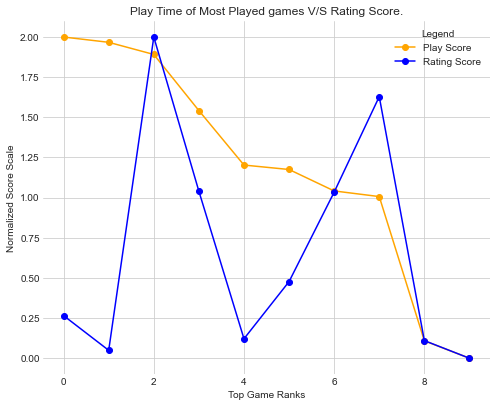

In [13]:
#testing for trends in most played games

fig1 = plt.figure(figsize=(8,6.5))
plt.plot(topst['Play Score'],'-o',label='Play Score',c='orange')
plt.plot(topst['Rating Score'],'-o',label='Rating Score',c='b')
plt.legend(title='Legend');
spines1 = plt.gca().spines
spines1['right'].set_visible(False)
spines1['top'].set_visible(False)
spines1['left'].set_visible(False)
spines1['bottom'].set_visible(False)
plt.grid()
plt.title('Play Time of Most Played games V/S Rating Score.');
plt.xlabel('Top Game Ranks');
plt.ylabel('Normalized Score Scale');

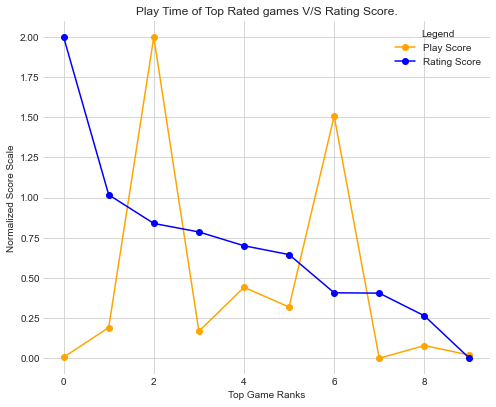

In [14]:
#testing for trends in top rated games

fig2 = plt.figure(figsize=(8.,6.5))
plt.plot(toprt['Play Score'],'-o',label='Play Score',c='orange')
plt.plot(toprt['Rating Score'],'-o',label='Rating Score',c='b')
plt.legend()
spines2 = plt.gca().spines
spines2['right'].set_visible(False)
spines2['top'].set_visible(False)
spines2['left'].set_visible(False)
spines2['bottom'].set_visible(False)
plt.title('Play Time of Top Rated games V/S Rating Score.');
plt.xlabel('Top Game Ranks');
plt.ylabel('Normalized Score Scale');
plt.legend(title='Legend')
plt.grid()

# Final Viusalization 

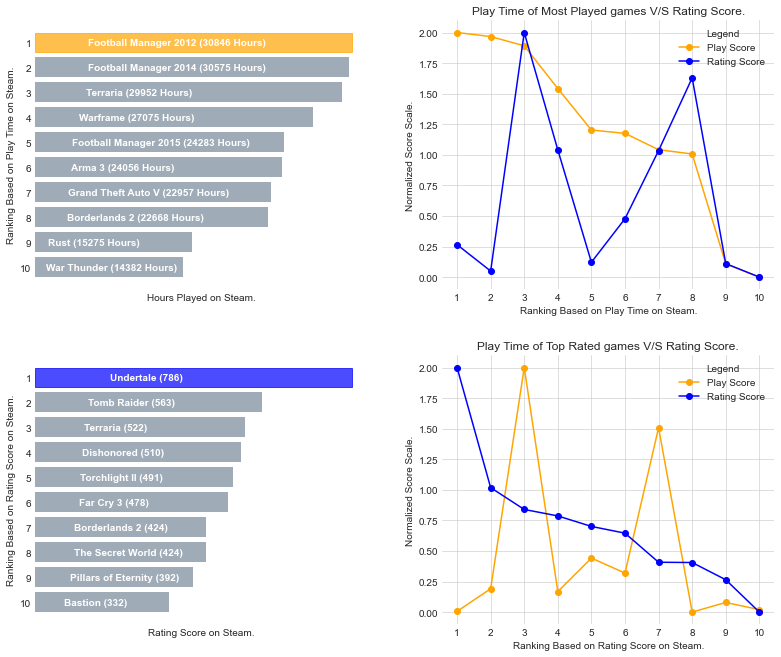

In [15]:
canv,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
canv.set_size_inches(12,10)
canv.tight_layout(pad=5.0)

#First Plot,(0,0)

plt.sca(ax1)
bars = plt.barh(np.arange(len(topst['Game'])),topst['Hours Played'].iloc[::-1],color='lightslategrey',alpha=0.7)
bars[-1].set_color('orange')

for bar,name,value in zip(bars,topst['Game'].iloc[::-1].tolist(),topst['Hours Played'].iloc[::-1].tolist()):
    plt.text((bar.get_width()/4)-2500,(bar.get_y()+0.3),name + ' ({:.0f} Hours)'.format(value),color='w',fontweight='bold')

plt.yticks(np.arange(len(topst['Game'])),np.array([10,9,8,7,6,5,4,3,2,1]));
ax1.set_xticks([])
plt.xlabel('Hours Played on Steam.')
plt.ylabel('Ranking Based on Play Time on Steam.')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

#Second Plot,(0,1)

plt.sca(ax2)
plt.plot(topst['Play Score'],'-o',label='Play Score',c='orange')
plt.plot(topst['Rating Score'],'-o',label='Rating Score',c='b')
plt.legend(title='Legend');

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.grid(alpha=0.8)
plt.title('Play Time of Most Played games V/S Rating Score.');
plt.xticks(np.arange(len(topst['Game'])),np.array([1,2,3,4,5,6,7,8,9,10]));
plt.xlabel('Ranking Based on Play Time on Steam.');
plt.ylabel('Normalized Score Scale.');

#Third Plot,(1,0)

plt.sca(ax3)
bars = plt.barh(np.arange(len(toprt['Game'])),toprt['Score'].iloc[::-1],color='lightslategrey',alpha=0.7)
bars[-1].set_color('b')

for bar,name,value in zip(bars,toprt['Game'].iloc[::-1].tolist(),toprt['Score'].iloc[::-1].tolist()):
    plt.text((bar.get_width()/4-10),(bar.get_y()+0.3),name + ' ({:.0f})'.format(value),color='w',fontweight='bold')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.yticks(np.arange(len(toprt['Game'])),np.array([10,9,8,7,6,5,4,3,2,1]));
ax3.set_xticks([])
plt.xlabel('Rating Score on Steam.')
plt.ylabel('Ranking Based on Rating Score on Steam.')

#Fourth Plot(1,1)

plt.sca(ax4)
plt.plot(toprt['Play Score'],'-o',label='Play Score',c='orange')
plt.plot(toprt['Rating Score'],'-o',label='Rating Score',c='b')
plt.legend()

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title('Play Time of Top Rated games V/S Rating Score.');
plt.xlabel('Ranking Based on Rating Score on Steam.');
plt.xticks(np.arange(len(toprt['Game'])),np.array([1,2,3,4,5,6,7,8,9,10]));
plt.ylabel('Normalized Score Scale.');
plt.legend(title='Legend');
plt.grid(alpha=0.8)

## Corollary :-
### First, As we can see there are really next to no co-relation between the rating and the play time of a game, This Peculiar phenomena is described below:

1. The rating system is found to be skewed along the genre of a game i.e if a game is a FPS(first person shooting) type game then you cannot compare its rating to the rating of a non FPS game

2. The Rating is developed as soon as the game hits the market whereas the play time increases gradually over the years therefor new game with better rating has infinitesimally small chance of having a play time more than the older games

3. Then there are the challenge of competitive games which demands rigorous play time and determination, this act skews our analysis

4. The nature of rating and repeated gaming is highlighted in the visualization in the fact that the set of top rated games and the set of most played games is disjoint in nature

## Final Summary:
#### To Further increase the accuracy of this analysis clustering is a good option and as of now rating and Play Hours Does not carry or Does but very little co-relation and hence rating is not a good indictor of a games market success